In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [7]:
df_everything_stats_sa199m2e = pd.read_csv('sa199m2e_new_everything_stats.csv')
df_everything_stats_sa196m2e = pd.read_csv('sa196m2e_new_everything_stats.csv')
df_everything_stats_sa196m1e = pd.read_csv('sa196m1e_new_everything_stats.csv')
df_everything_stats_sa198m2e = pd.read_csv('sa198m2e_new_everything_stats.csv')
df_everything_stats_sa196m3e = pd.read_csv('sa196m3e_new_everything_stats.csv')
df_everything_stats_sa199m3e = pd.read_csv('sa199m3e_new_everything_stats.csv')
df_everything_stats_sa199m1e = pd.read_csv('sa199m1e_new_everything_stats.csv')
df_everything_stats_sa78m1 = pd.read_csv('sa78m1_new_everything_stats.csv')
df_everything_stats_sa78m3 = pd.read_csv('sa78m3_new_everything_stats.csv')
df_everything_stats_sa78m5 = pd.read_csv('sa78m5_new_everything_stats.csv')

In [8]:
pl_everything_stats_sa199m2e = pl.read_csv('sa199m2e_new_everything_stats.csv')
pl_everything_stats_sa196m2e = pl.read_csv('sa196m2e_new_everything_stats.csv')
pl_everything_stats_sa196m1e = pl.read_csv('sa196m1e_new_everything_stats.csv')
pl_everything_stats_sa198m2e = pl.read_csv('sa198m2e_new_everything_stats.csv')
pl_everything_stats_sa196m3e = pl.read_csv('sa196m3e_new_everything_stats.csv')
pl_everything_stats_sa199m3e = pl.read_csv('sa199m3e_new_everything_stats.csv')
pl_everything_stats_sa199m1e = pl.read_csv('sa199m1e_new_everything_stats.csv')
pl_everything_stats_sa78m1 = pl.read_csv('sa78m1_new_everything_stats.csv')
pl_everything_stats_sa78m3 = pl.read_csv('sa78m3_new_everything_stats.csv')
pl_everything_stats_sa78m5 = pl.read_csv('sa78m5_new_everything_stats.csv')

In [6]:
'''
function to create the lagging for all previous 4 choices
'''
def lagging_four_prev_choices(df_pls, mouse_id):
    lagged_df_everything_stats = df_pls.select(
    "Duration", 
    *[pl.col("Duration").shift(i).alias(f"lagged_{i}_duration") for i in [1,2,3,4]],
    "Entry Latency", 
    *[pl.col("Entry Latency").shift(i).alias(f"lagged_{i}_entry_lat") for i in [1,2,3,4]],
    "Exit Latency", 
    *[pl.col("Exit Latency").shift(i).alias(f"lagged_{i}_exit_lat") for i in [1,2,3,4]], 
    "Nose Max Distance",
    *[pl.col("Nose Max Distance").shift(i).alias(f"lagged_{i}_nose_max_distance") for i in [1,2,3,4]],    
    "Nose Time to Max Dist",
    *[pl.col("Nose Time to Max Dist").shift(i).alias(f"lagged_{i}_nose_time_to_max_dist") for i in [1,2,3,4]],        
    "Tail Base Max Distance",
    *[pl.col("Tail Base Max Distance").shift(i).alias(f"lagged_{i}_tail_max_distance") for i in [1,2,3,4]],    
    "Tail Base Time to Max Dist",
    *[pl.col("Tail Base Time to Max Dist").shift(i).alias(f"lagged_{i}_tail_time_to_max_dist") for i in [1,2,3,4]],       
    "Arm Nose Movement", 
    *[pl.col("Arm Nose Movement").shift(i).alias(f"lagged_{i}_arm_nose_mov") for i in [1,2,3,4]],
    "Arm Nose Velocity", 
    *[pl.col("Arm Nose Velocity").shift(i).alias(f"lagged_{i}_arm_nose_vel") for i in [1,2,3,4]],
    "Arm Tail Movement", 
    *[pl.col("Arm Tail Movement").shift(i).alias(f"lagged_{i}_arm_tail_mov") for i in [1,2,3,4]],
    "Arm Tail Velocity", 
    *[pl.col("Arm Tail Velocity").shift(i).alias(f"lagged_{i}_arm_tail_vel") for i in [1,2,3,4]],
    "Entry Tortuosity",
    *[pl.col("Entry Tortuosity").shift(i).alias(f"lagged_{i}_entry_tortuosity") for i in [1,2,3,4]],       
    "Exit Tortuosity",
    *[pl.col("Exit Tortuosity").shift(i).alias(f"lagged_{i}_exit_tortuosity") for i in [1,2,3,4]],    
    "Other Tortuosity",
    *[pl.col("Other Tortuosity").shift(i).alias(f"lagged_{i}_other_tortuosity") for i in [1,2,3,4]],    
    "Middle Duration", 
    *[pl.col("Middle Duration").shift(i).alias(f"lagged_{i}_mid_duration") for i in [1,2,3,4]],
    "Middle Nose Movement", 
    *[pl.col("Middle Nose Movement").shift(i).alias(f"lagged_{i}_mid_nose_mov") for i in [1,2,3,4]],
    "Middle Nose Velocity", 
    *[pl.col("Middle Nose Velocity").shift(i).alias(f"lagged_{i}_mid_nose_vel") for i in [1,2,3,4]],
    "Middle Tail Movement", 
    *[pl.col("Middle Tail Movement").shift(i).alias(f"lagged_{i}_mid_tail_mov") for i in [1,2,3,4]],
    "Middle Tail Velocity", 
    *[pl.col("Middle Tail Velocity").shift(i).alias(f"lagged_{i}_mid_tail_vel") for i in [1,2,3,4]],

    "ExitMid Duration",
    *[pl.col("ExitMid Duration").shift(i).alias(f"lagged_{i}_exitmid_duration") for i in [1,2,3,4]],
    "MidEntry Duration", 
    *[pl.col("MidEntry Duration").shift(i).alias(f"lagged_{i}_midentry_duration") for i in [1,2,3,4]],
    "ExitMidEntry Duration",
    *[pl.col("ExitMidEntry Duration").shift(i).alias(f"lagged_{i}_exitmidentry_duration") for i in [1,2,3,4]],
    
    "Current Coeff", 
    *[pl.col("Current Coeff").shift(i).alias(f"lagged_{i}_current_coeff") for i in [1,2,3,4]],
    
    "Lagged 1 Cur Coeff", 
    *[pl.col("Lagged 1 Cur Coeff").shift(i).alias(f"lagged_{i}_lagged_1_cur_coeff") for i in [1,2,3,4]],
    "Lagged 2 Cur Coeff", 
    *[pl.col("Lagged 2 Cur Coeff").shift(i).alias(f"lagged_{i}_lagged_2_cur_coeff") for i in [1,2,3,4]],
    "Lagged 3 Cur Coeff", 
    *[pl.col("Lagged 3 Cur Coeff").shift(i).alias(f"lagged_{i}_lagged_3_cur_coeff") for i in [1,2,3,4]],
    "Lagged 4 Cur Coeff", 
    *[pl.col("Lagged 4 Cur Coeff").shift(i).alias(f"lagged_{i}_lagged_4_cur_coeff") for i in [1,2,3,4]],

    
    "Current Coeff Time Proportional", 
    *[pl.col("Current Coeff Time Proportional").shift(i).alias(f"lagged_{i}_current_coeff_time_prop") for i in [1,2,3,4]],

    "Lagged 1 Cur Coeff Time Proportional", 
    *[pl.col("Lagged 1 Cur Coeff Time Proportional").shift(i).alias(f"lagged_{i}_lagged_1_cur_coeff_time_prop") for i in [1,2,3,4]],
    "Lagged 2 Cur Coeff Time Proportional", 
    *[pl.col("Lagged 2 Cur Coeff Time Proportional").shift(i).alias(f"lagged_{i}_lagged_2_cur_coeff_time_prop") for i in [1,2,3,4]],
    "Lagged 3 Cur Coeff Time Proportional", 
    *[pl.col("Lagged 3 Cur Coeff Time Proportional").shift(i).alias(f"lagged_{i}_lagged_3_cur_coeff_time_prop") for i in [1,2,3,4]],
    "Lagged 4 Cur Coeff Time Proportional", 
    *[pl.col("Lagged 4 Cur Coeff Time Proportional").shift(i).alias(f"lagged_{i}_lagged_4_cur_coeff_time_prop") for i in [1,2,3,4]],
    
    "Turn",
    *[pl.col("Turn").shift(i).alias(f"lagged_{i}_turn_ago") for i in [1,2,3,4]],
    "Choice Output", 
    *[pl.col("Choice Output").shift(i).alias(f"lagged_{i}_choice_ago") for i in [1,2,3,4]]
    )
    lagged_df_everything_stats = lagged_df_everything_stats.drop_nulls()
    
    lagged_df_everything_stats.write_csv(mouse_id+'_new_lagged_mm_everything_stats.csv')
    return lagged_df_everything_stats;

In [9]:
lagged_everything_stats_sa199m2e = lagging_four_prev_choices(pl_everything_stats_sa199m2e, 'uns_sa199m2e')
lagged_everything_stats_sa196m2e = lagging_four_prev_choices(pl_everything_stats_sa196m2e, 'uns_sa196m2e')
lagged_everything_stats_sa196m1e = lagging_four_prev_choices(pl_everything_stats_sa196m1e, 'uns_sa196m1e')
lagged_everything_stats_sa198m2e = lagging_four_prev_choices(pl_everything_stats_sa198m2e, 'uns_sa198m2e')
lagged_everything_stats_sa196m3e = lagging_four_prev_choices(pl_everything_stats_sa196m3e, 'uns_sa196m3e')
lagged_everything_stats_sa199m3e = lagging_four_prev_choices(pl_everything_stats_sa199m3e, 'uns_sa199m3e')
lagged_everything_stats_sa199m1e = lagging_four_prev_choices(pl_everything_stats_sa199m1e, 'uns_sa199m1e')
lagged_everything_stats_sa78m1 = lagging_four_prev_choices(pl_everything_stats_sa78m1, 'uns_sa78m1')
lagged_everything_stats_sa78m3  = lagging_four_prev_choices(pl_everything_stats_sa78m3, 'uns_sa78m3')
lagged_everything_stats_sa78m5 = lagging_four_prev_choices(pl_everything_stats_sa78m5, 'uns_sa78m5')

In [11]:
df_lagged_everything_stats_sa199m2e = pd.read_csv('uns_sa199m2e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa196m2e = pd.read_csv('uns_sa196m2e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa196m1e = pd.read_csv('uns_sa196m1e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa198m2e = pd.read_csv('uns_sa198m2e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa196m3e = pd.read_csv('uns_sa196m3e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa199m3e = pd.read_csv('uns_sa199m3e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa199m1e = pd.read_csv('uns_sa199m1e_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa78m1 = pd.read_csv('uns_sa78m1_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa78m3 = pd.read_csv('uns_sa78m3_new_lagged_mm_everything_stats.csv')
df_lagged_everything_stats_sa78m5 = pd.read_csv('uns_sa78m5_new_lagged_mm_everything_stats.csv')

# plots for unscaled grouped data

In [14]:
grouped_uns = pd.concat([df_lagged_everything_stats_sa199m2e, df_lagged_everything_stats_sa196m2e, df_lagged_everything_stats_sa196m1e, df_lagged_everything_stats_sa198m2e,
                        df_lagged_everything_stats_sa196m3e, df_lagged_everything_stats_sa199m3e, df_lagged_everything_stats_sa199m1e, df_lagged_everything_stats_sa78m1,
                        df_lagged_everything_stats_sa78m3, df_lagged_everything_stats_sa78m5])

In [16]:
grouped_uns.columns

Index(['Duration', 'lagged_1_duration', 'lagged_2_duration',
       'lagged_3_duration', 'lagged_4_duration', 'Entry Latency',
       'lagged_1_entry_lat', 'lagged_2_entry_lat', 'lagged_3_entry_lat',
       'lagged_4_entry_lat',
       ...
       'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago',
       'lagged_4_turn_ago', 'Choice Output', 'lagged_1_choice_ago',
       'lagged_2_choice_ago', 'lagged_3_choice_ago', 'lagged_4_choice_ago'],
      dtype='object', length=170)

In [62]:
grouped_uns_ri = grouped_uns.reset_index(drop=True)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Choice Output', ylabel='Count'>

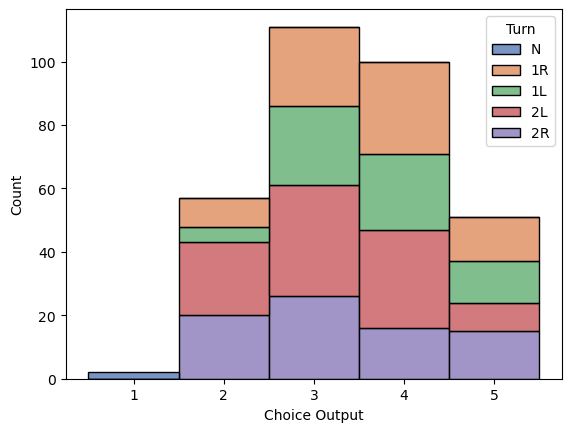

In [161]:
sns.histplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Choice Output', hue = 'Turn', multiple = 'stack', discrete = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Turn', ylabel='Count'>

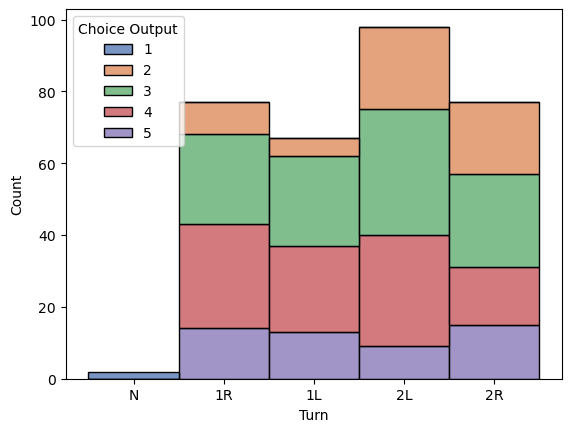

In [162]:
sns.histplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Turn', hue = 'Choice Output', multiple = 'stack', palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff', ylabel='Choice Output'>

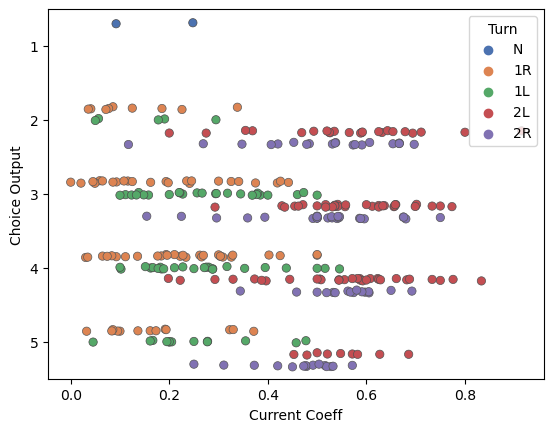

In [133]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff', ylabel='Turn'>

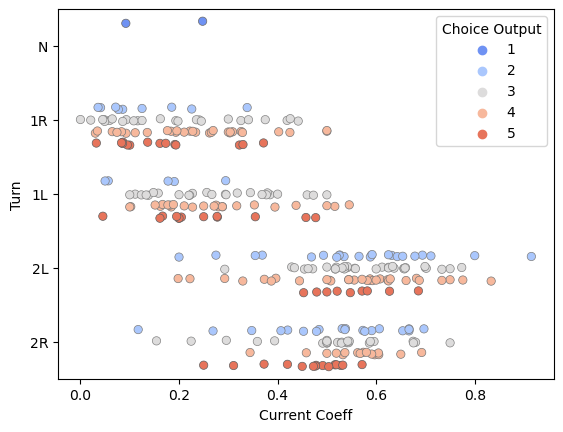

In [132]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff Time Proportional', ylabel='Choice Output'>

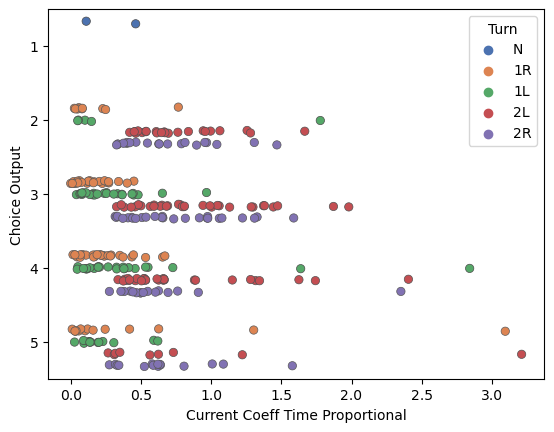

In [130]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff Time Proportional', ylabel='Turn'>

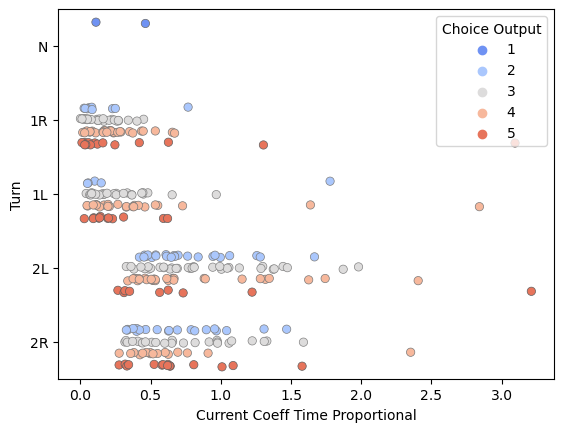

In [131]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff', ylabel='Choice Output'>

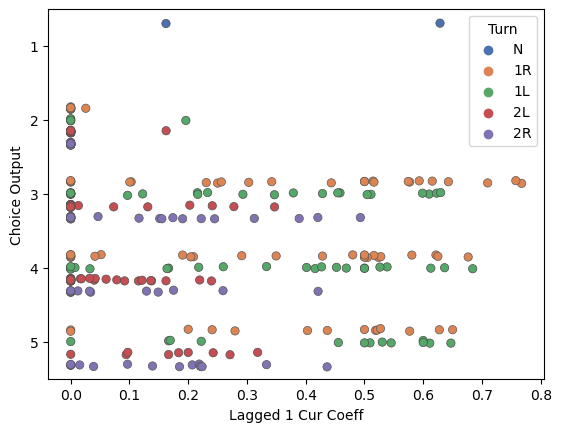

In [134]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff', ylabel='Turn'>

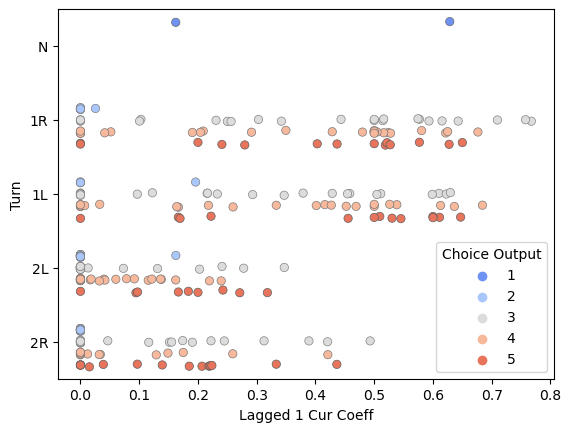

In [135]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff Time Proportional', ylabel='Choice Output'>

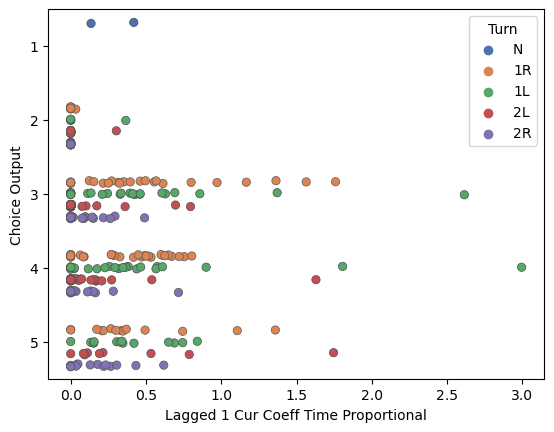

In [139]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff Time Proportional', ylabel='Turn'>

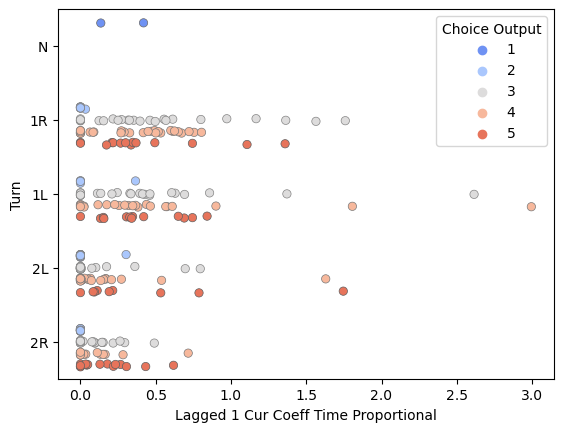

In [138]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff', ylabel='Choice Output'>

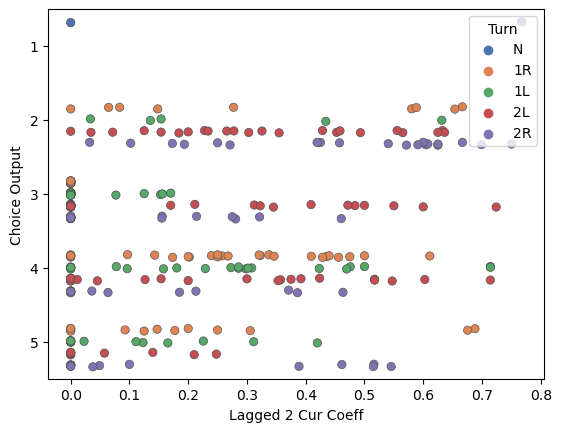

In [140]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff', ylabel='Turn'>

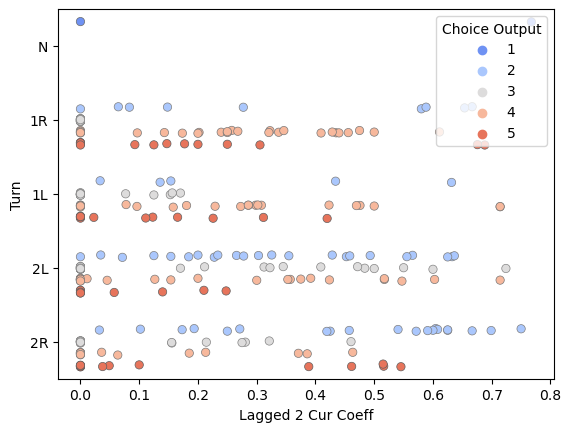

In [141]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff Time Proportional', ylabel='Choice Output'>

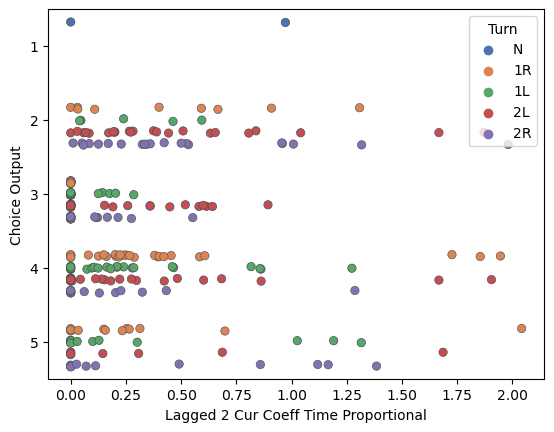

In [142]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff Time Proportional', ylabel='Turn'>

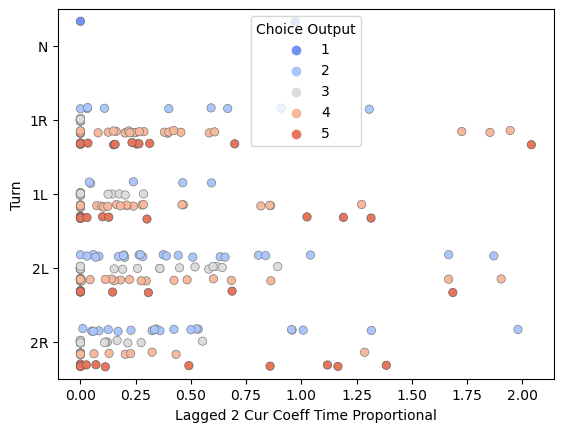

In [143]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff', ylabel='Choice Output'>

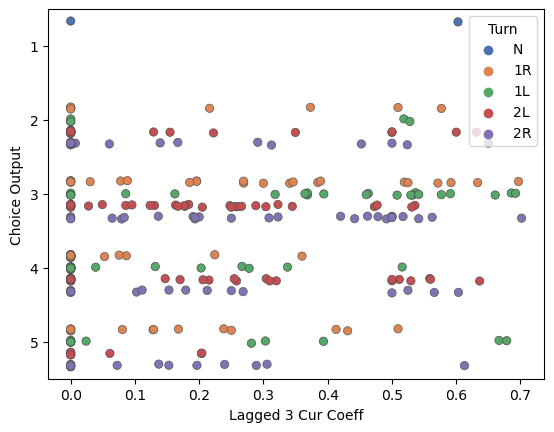

In [200]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff', ylabel='Turn'>

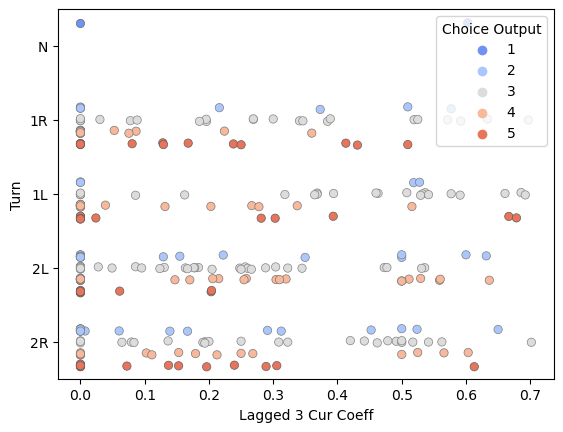

In [201]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff Time Proportional', ylabel='Choice Output'>

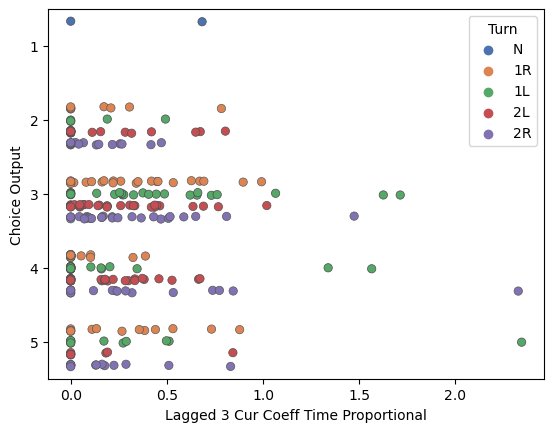

In [202]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff Time Proportional', ylabel='Turn'>

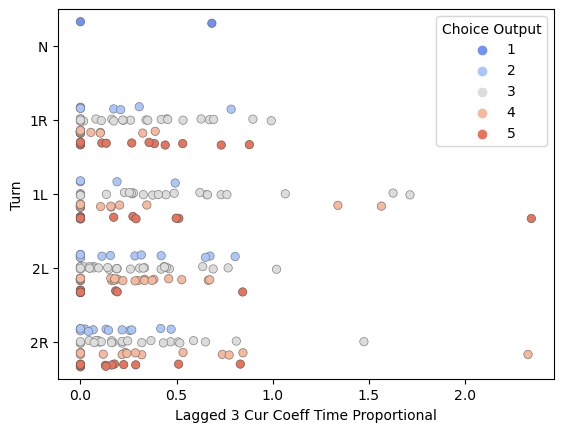

In [203]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff', ylabel='Choice Output'>

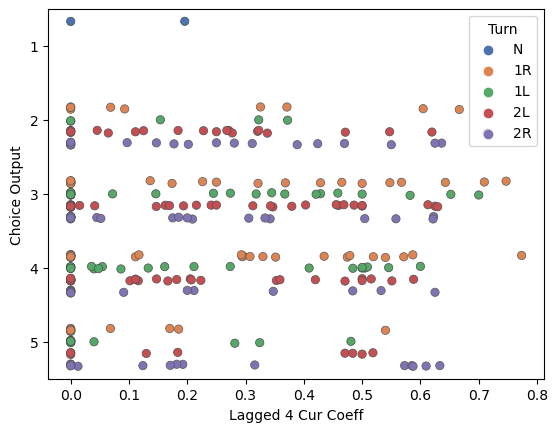

In [204]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff', ylabel='Turn'>

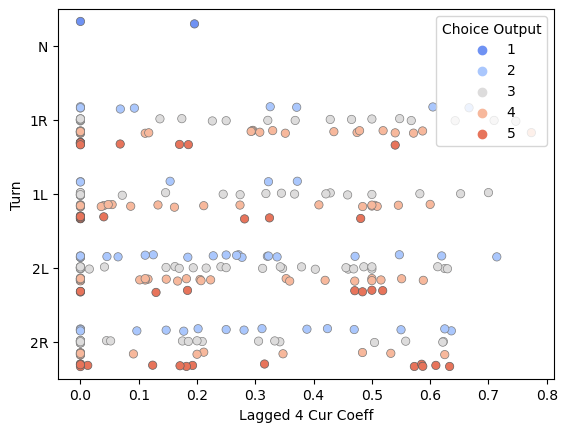

In [205]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff Time Proportional', ylabel='Choice Output'>

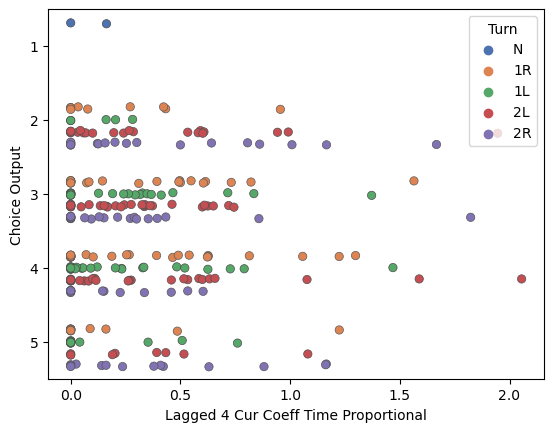

In [206]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff Time Proportional', ylabel='Turn'>

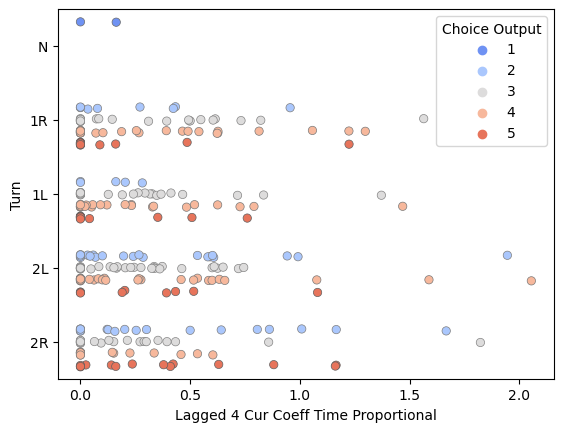

In [207]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Duration', ylabel='Choice Output'>

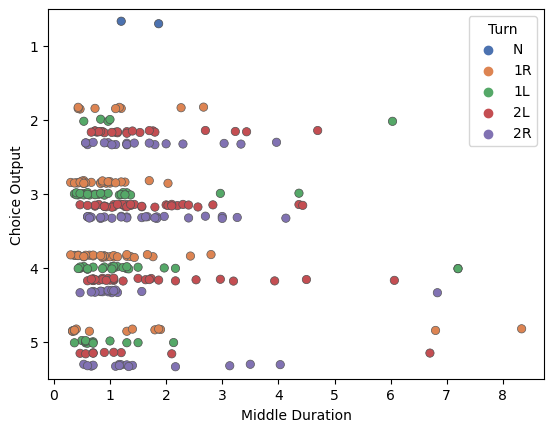

In [236]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Duration', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Duration', ylabel='Turn'>

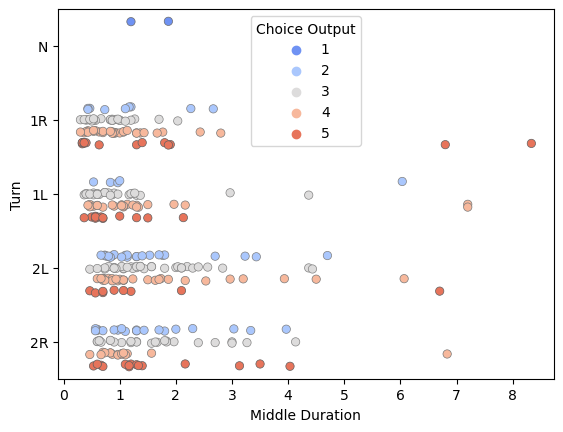

In [234]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Duration', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Movement', ylabel='Choice Output'>

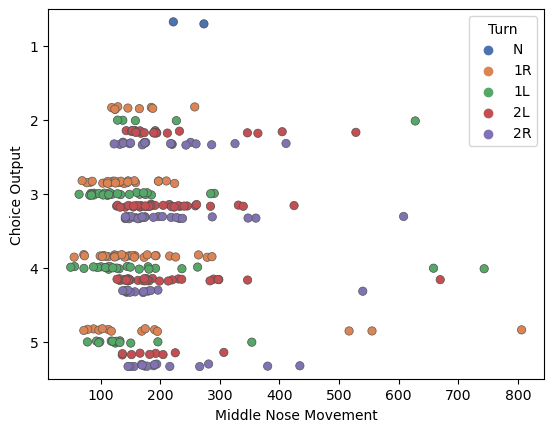

In [258]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Movement', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Movement', ylabel='Turn'>

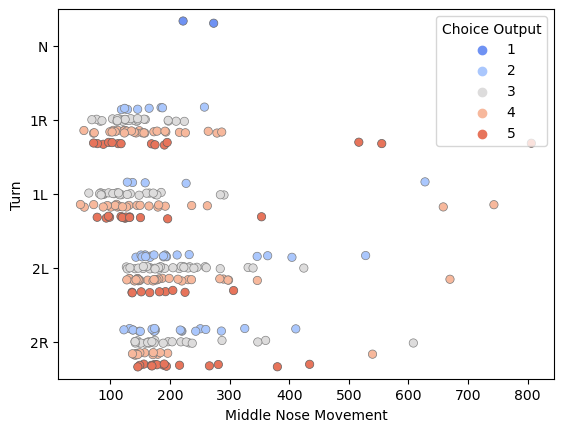

In [259]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Movement', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Velocity', ylabel='Choice Output'>

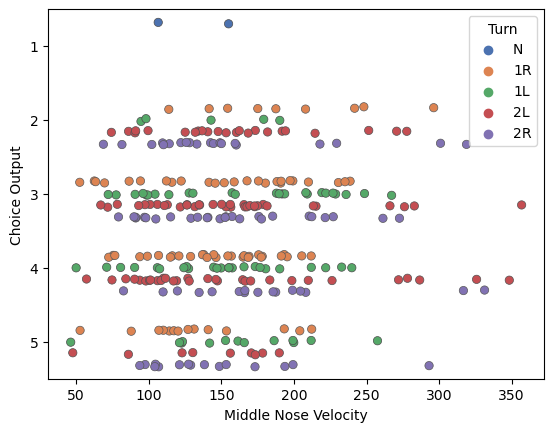

In [260]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Velocity', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Velocity', ylabel='Turn'>

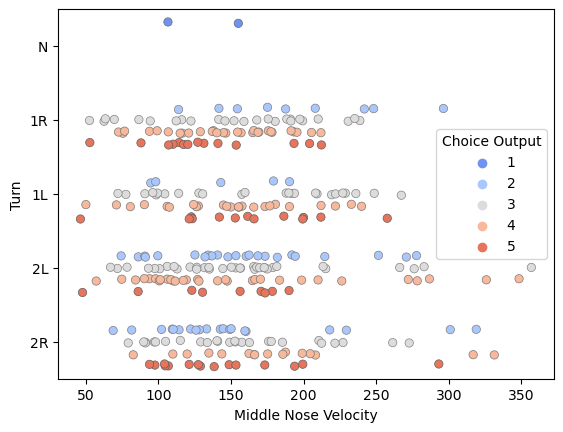

In [261]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Velocity', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Movement', ylabel='Choice Output'>

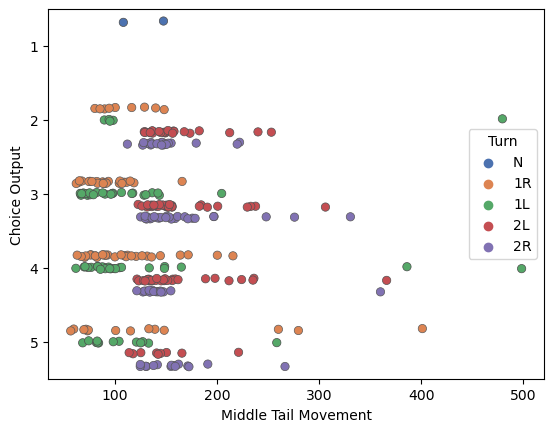

In [262]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Movement', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Movement', ylabel='Turn'>

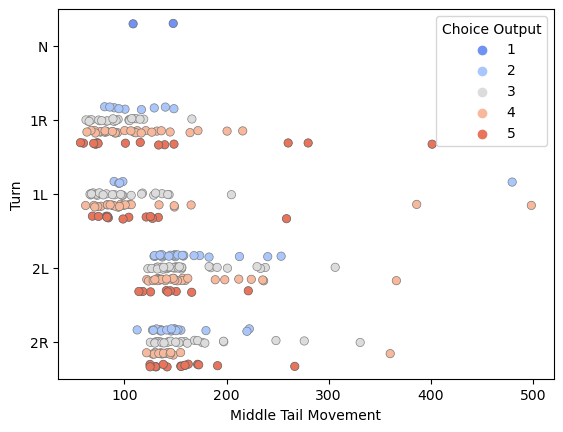

In [263]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Movement', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Velocity', ylabel='Choice Output'>

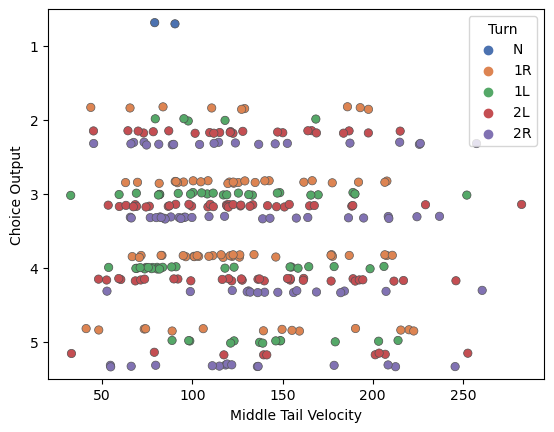

In [264]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Velocity', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Velocity', ylabel='Turn'>

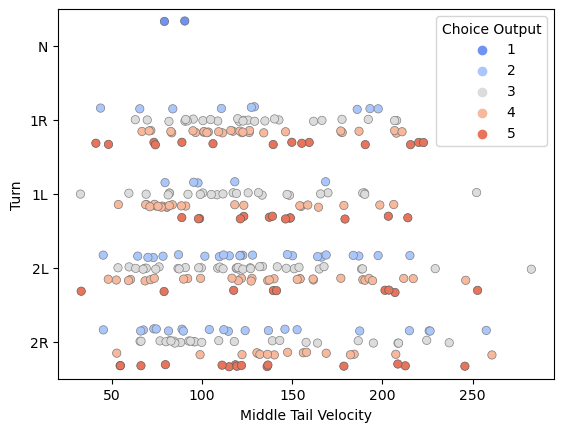

In [265]:
sns.stripplot(data = grouped_uns_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Velocity', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

# plots for scaled grouped data (as fed to the classifier)

In [152]:
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_lagged_added_stats.csv')

In [154]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [156]:
grouped_lagged_added_stats_ri = grouped_lagged_added_stats.reset_index(drop=True)

In [158]:
grouped_lagged_added_stats_ri['Choice Output'] = grouped_lagged_added_stats_ri['Choice Output'].astype(str)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Choice Output', ylabel='Count'>

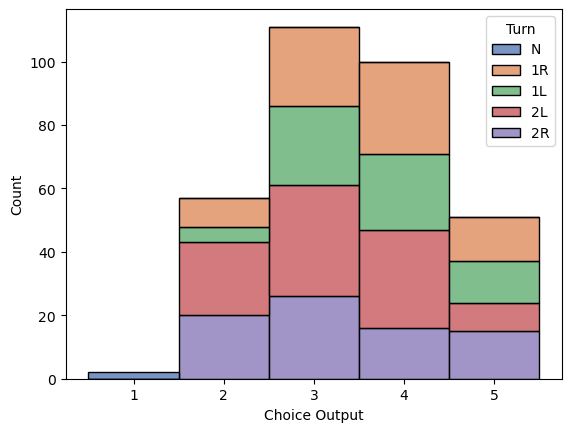

In [160]:
sns.histplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Choice Output', hue = 'Turn', multiple = 'stack', discrete = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Turn', ylabel='Count'>

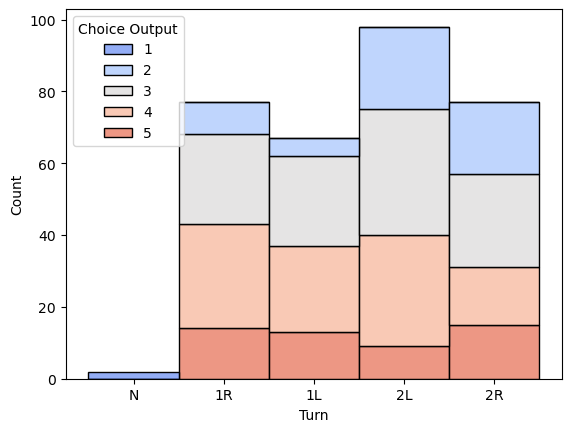

In [257]:
sns.histplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Turn', hue = 'Choice Output', multiple = 'stack', palette = 'coolwarm')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff', ylabel='Choice Output'>

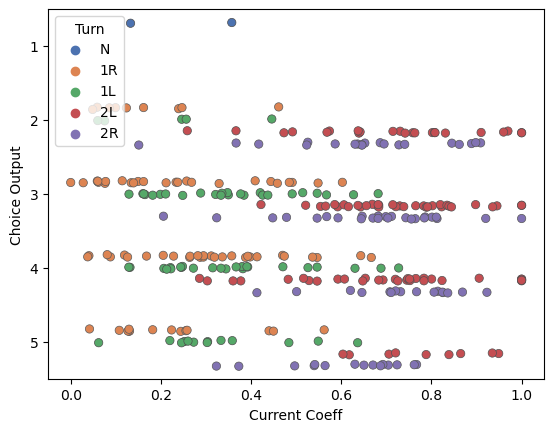

In [164]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff', ylabel='Turn'>

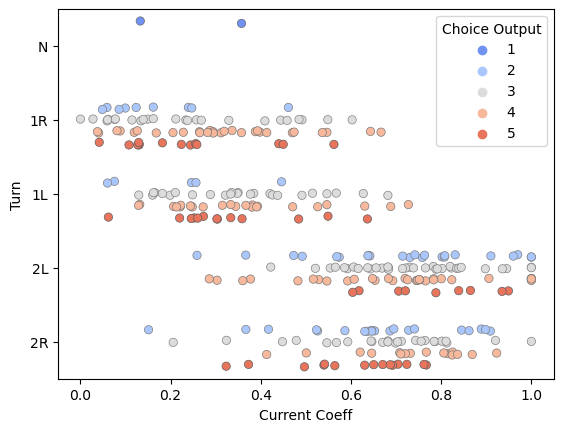

In [165]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff Time Proportional', ylabel='Choice Output'>

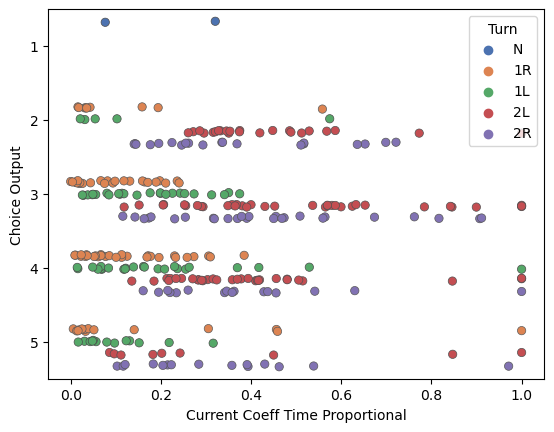

In [166]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Current Coeff Time Proportional', ylabel='Turn'>

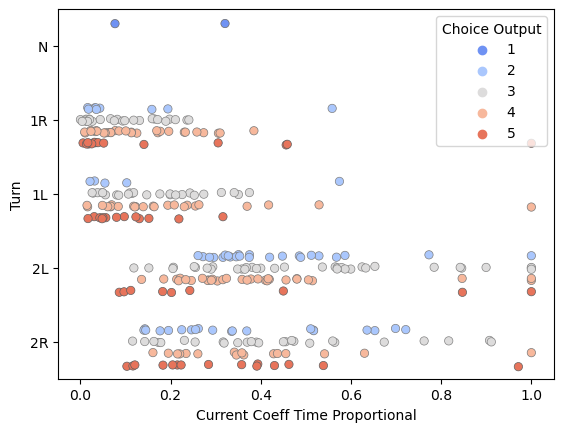

In [167]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Current Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff', ylabel='Choice Output'>

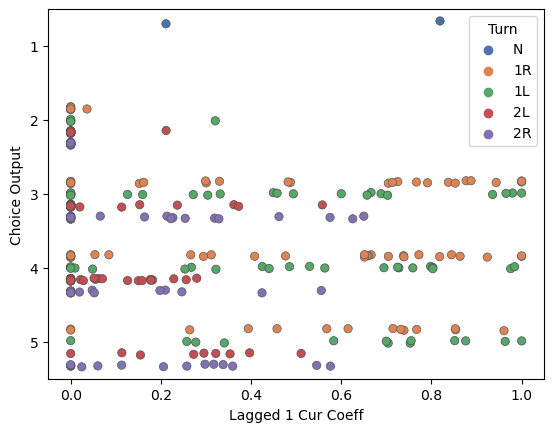

In [168]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff', ylabel='Turn'>

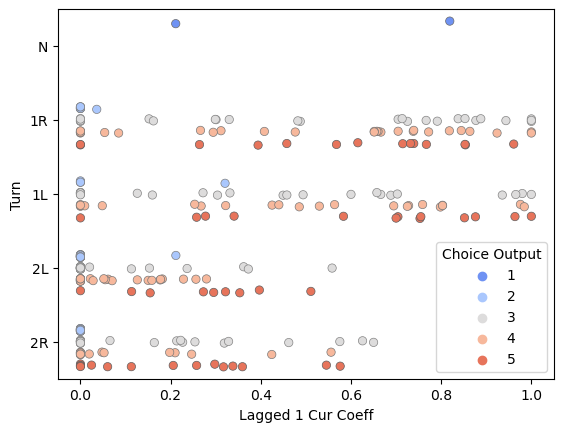

In [169]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff Time Proportional', ylabel='Choice Output'>

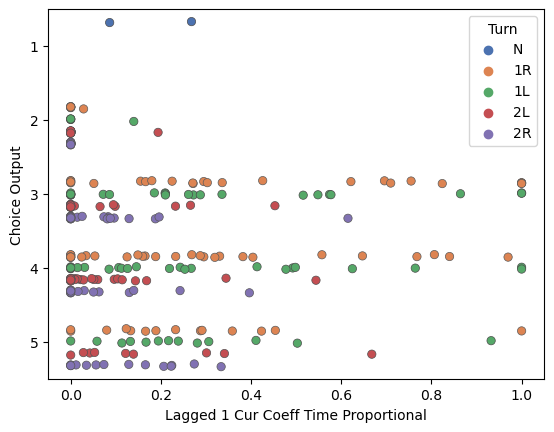

In [170]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 1 Cur Coeff Time Proportional', ylabel='Turn'>

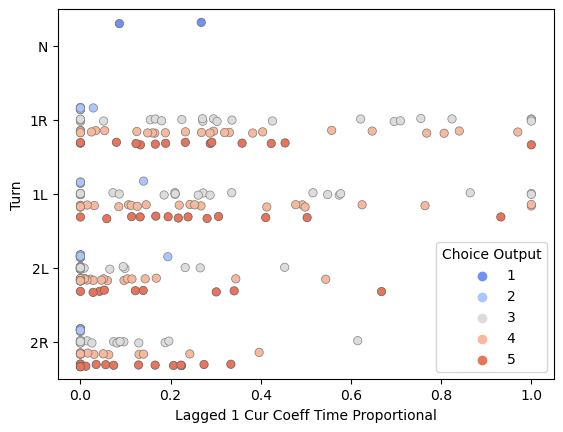

In [171]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 1 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff', ylabel='Choice Output'>

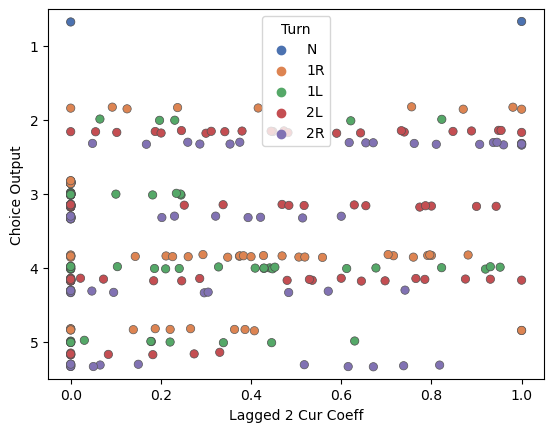

In [172]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff', ylabel='Turn'>

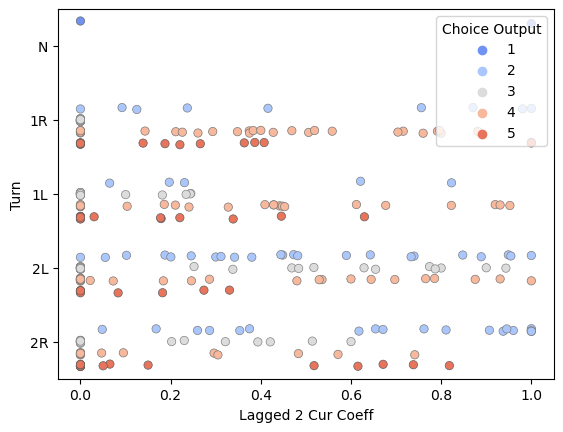

In [173]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff Time Proportional', ylabel='Choice Output'>

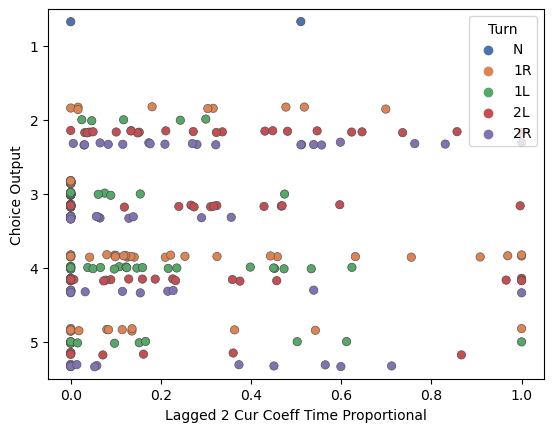

In [174]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 2 Cur Coeff Time Proportional', ylabel='Turn'>

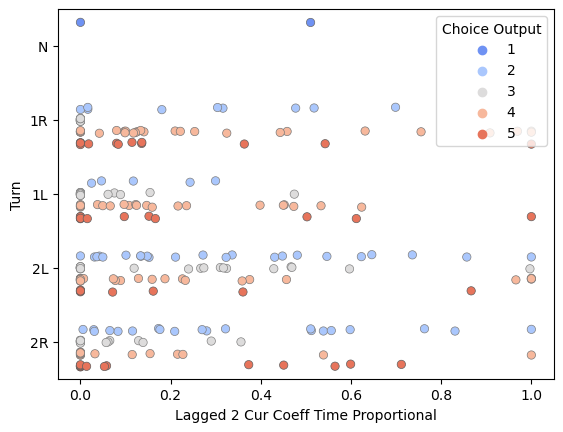

In [175]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 2 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff', ylabel='Choice Output'>

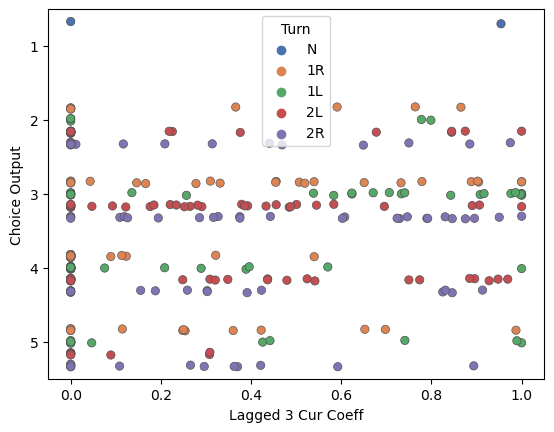

In [191]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff', ylabel='Turn'>

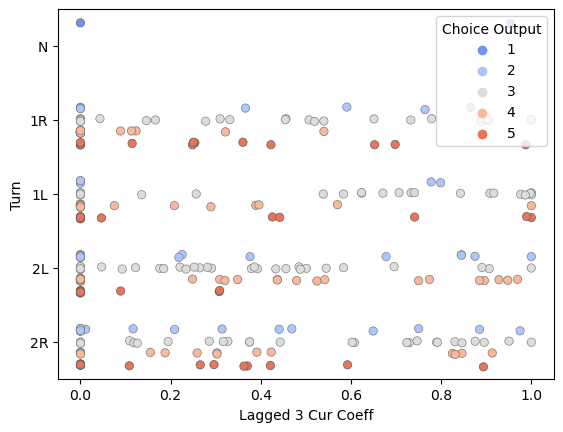

In [190]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff Time Proportional', ylabel='Choice Output'>

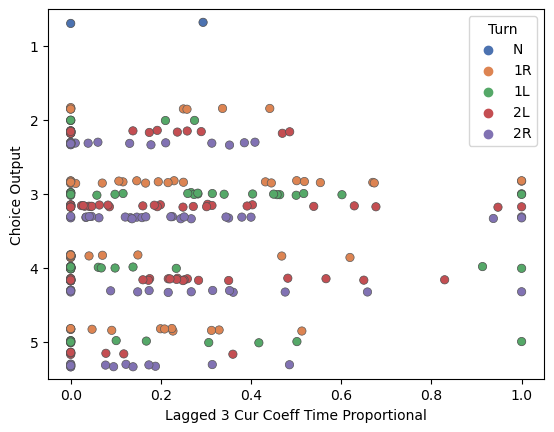

In [189]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 3 Cur Coeff Time Proportional', ylabel='Turn'>

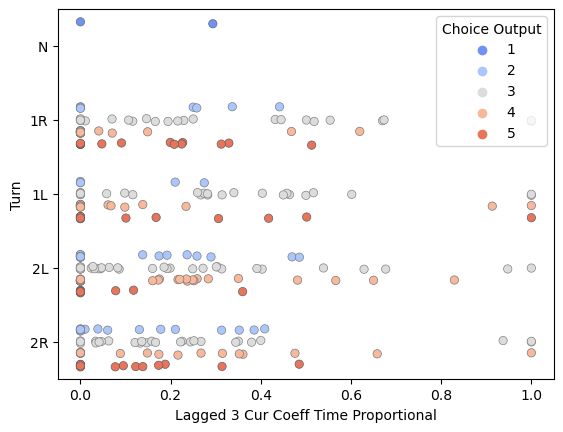

In [188]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 3 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff', ylabel='Choice Output'>

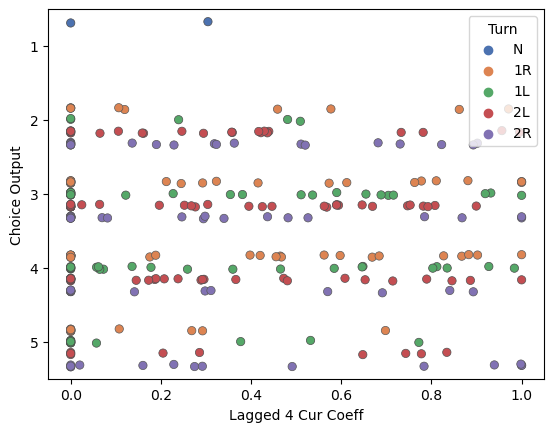

In [187]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff', ylabel='Turn'>

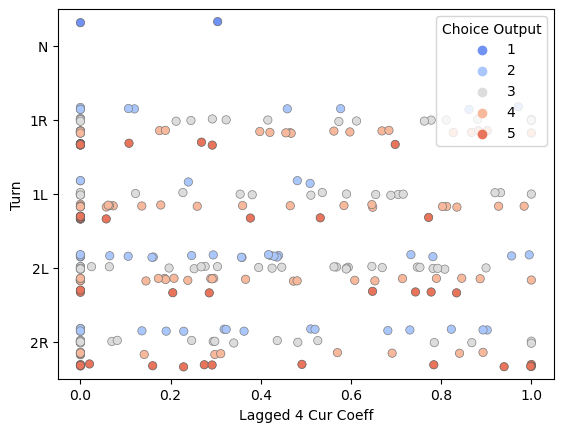

In [186]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff Time Proportional', ylabel='Choice Output'>

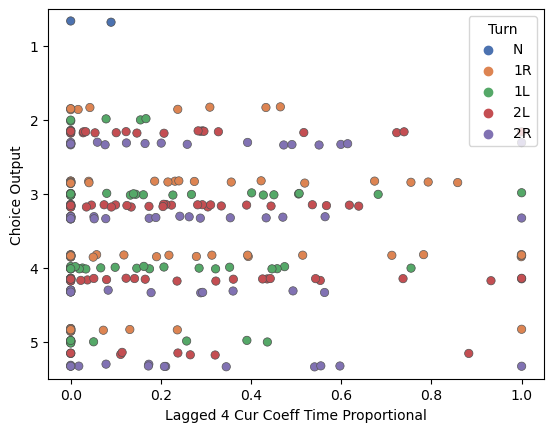

In [185]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff Time Proportional', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lagged 4 Cur Coeff Time Proportional', ylabel='Turn'>

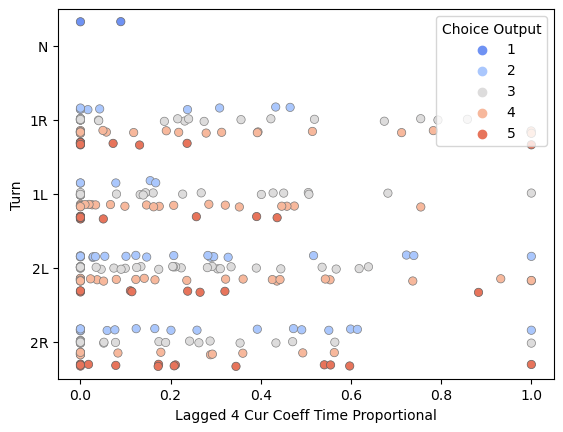

In [184]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Lagged 4 Cur Coeff Time Proportional', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Duration', ylabel='Choice Output'>

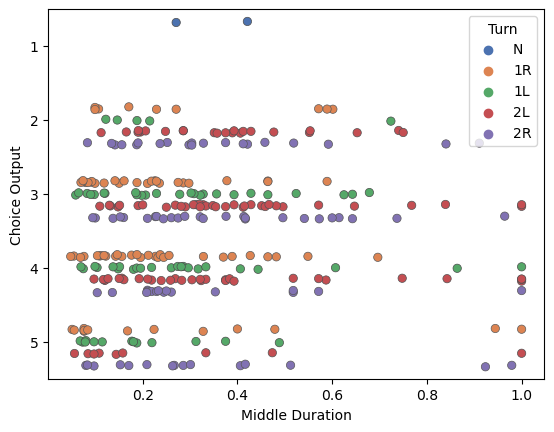

In [239]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Duration', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Duration', ylabel='Turn'>

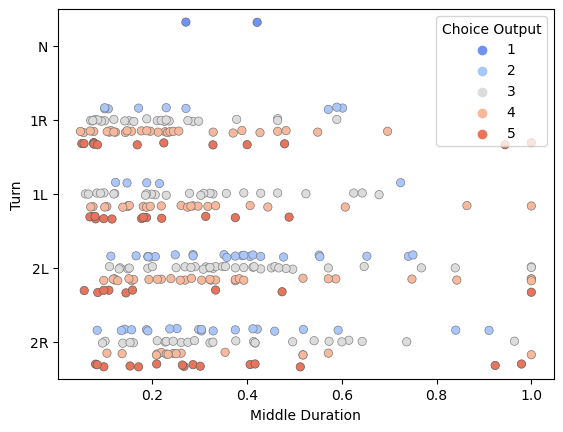

In [237]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Duration', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exit_lat', ylabel='Choice Output'>

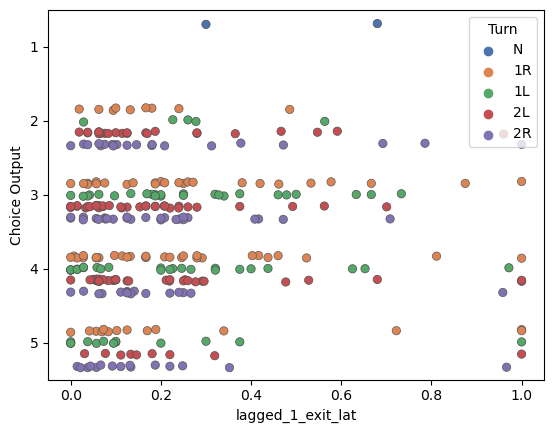

In [240]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exit_lat', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exit_lat', ylabel='Turn'>

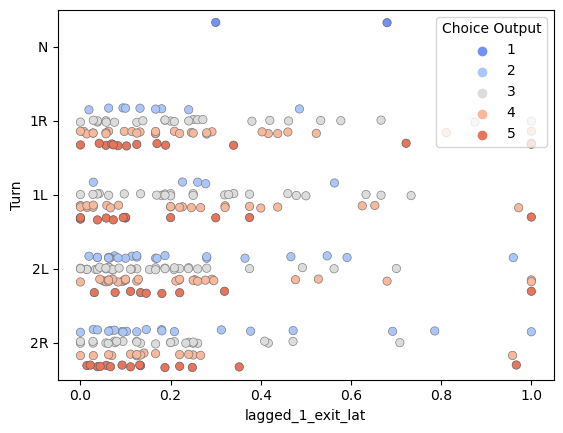

In [241]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exit_lat', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Entry Latency', ylabel='Choice Output'>

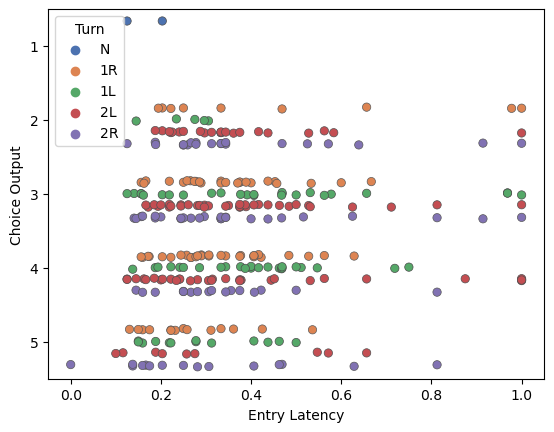

In [243]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Entry Latency', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Entry Latency', ylabel='Turn'>

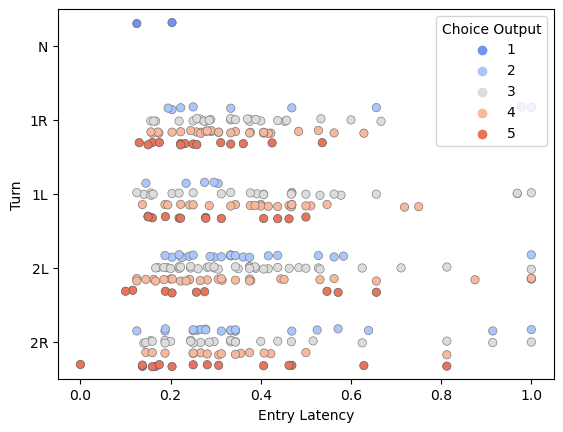

In [242]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Entry Latency', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exitmid_duration', ylabel='Choice Output'>

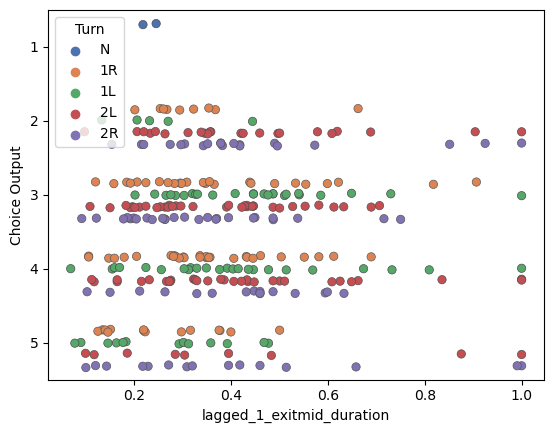

In [249]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exitmid_duration', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exitmid_duration', ylabel='Turn'>

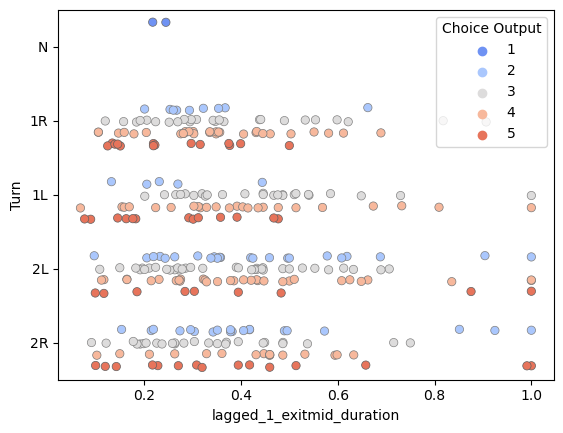

In [250]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exitmid_duration', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exitmidentry_duration', ylabel='Choice Output'>

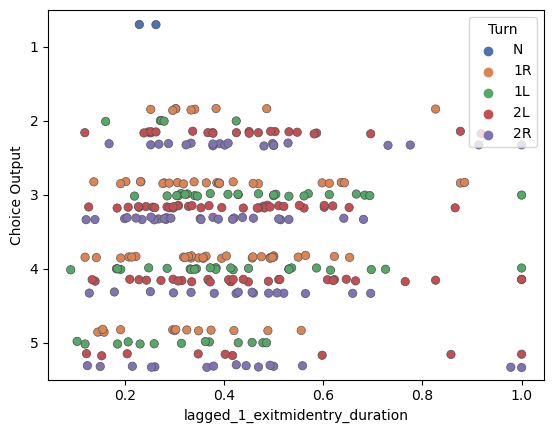

In [245]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exitmidentry_duration', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_1_exitmidentry_duration', ylabel='Turn'>

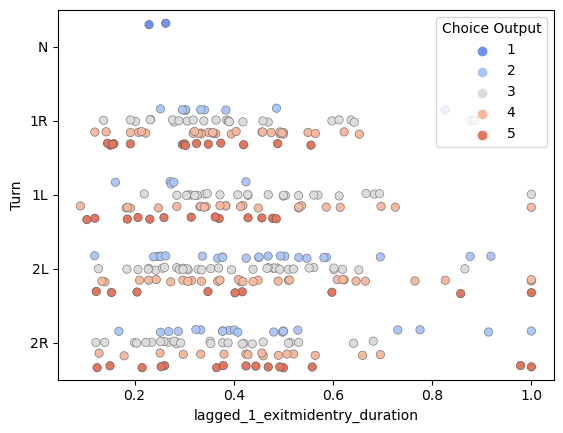

In [246]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'lagged_1_exitmidentry_duration', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Velocity', ylabel='Choice Output'>

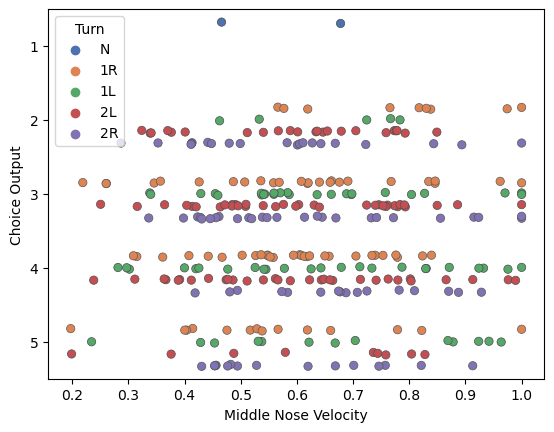

In [247]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Velocity', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Velocity', ylabel='Turn'>

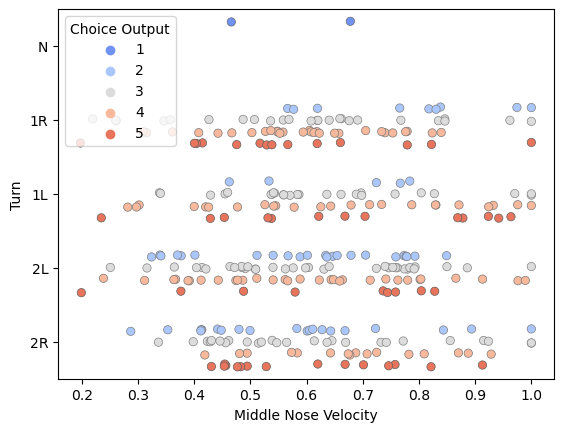

In [248]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Velocity', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Velocity', ylabel='Choice Output'>

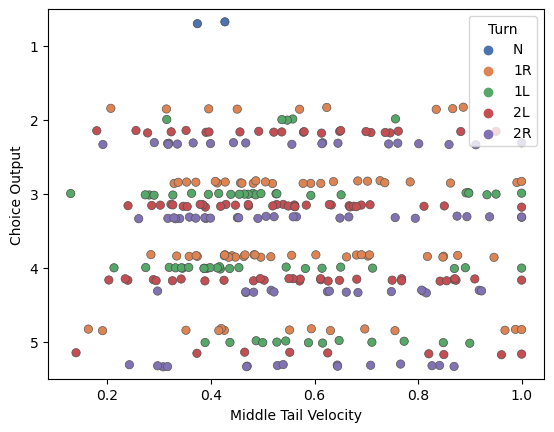

In [251]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Velocity', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Velocity', ylabel='Turn'>

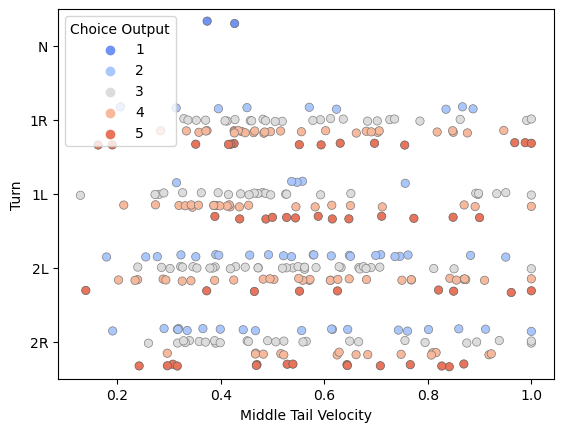

In [252]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Velocity', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Movement', ylabel='Choice Output'>

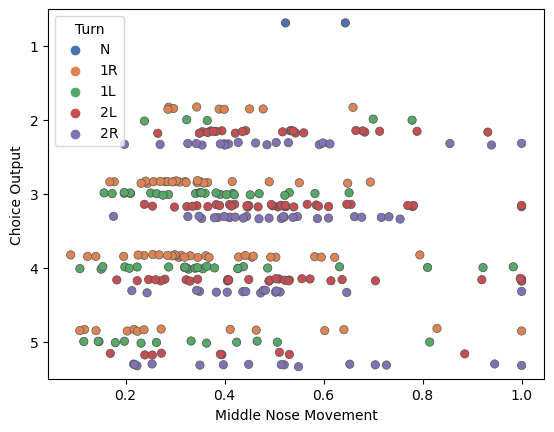

In [253]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Movement', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Nose Movement', ylabel='Turn'>

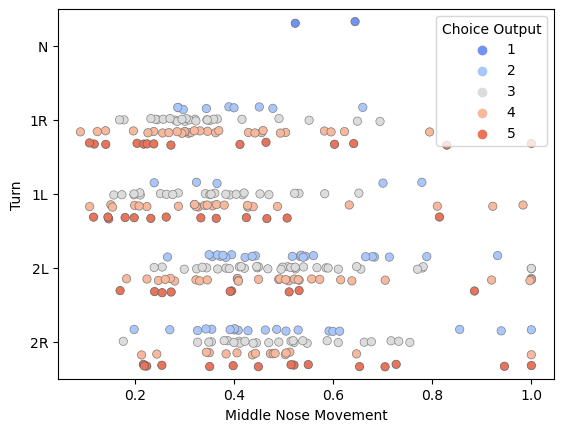

In [254]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Nose Movement', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Movement', ylabel='Choice Output'>

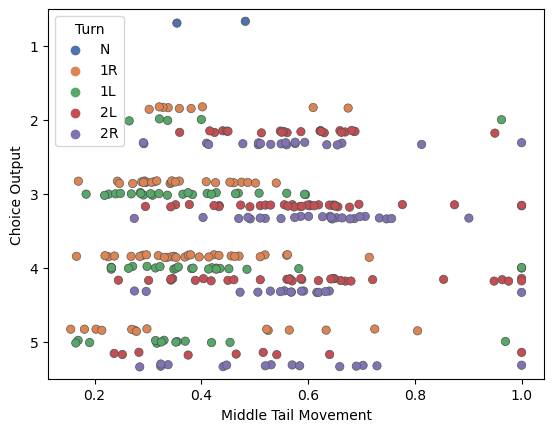

In [255]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Movement', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Middle Tail Movement', ylabel='Turn'>

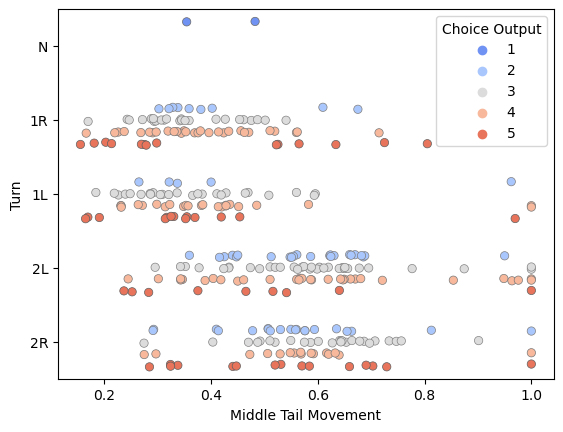

In [256]:
sns.stripplot(data = grouped_lagged_added_stats_ri.sort_values(by = 'Choice Output'), x = 'Middle Tail Movement', y = 'Turn', hue = 'Choice Output', palette = 'coolwarm', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)